In [2]:
import gzip
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

test_set = unpickle('cifar-10-batches-py/test_batch')
meta        = unpickle("cifar-10-batches-py/batches.meta")

# Chargement de l'ensemble des batch en vue d'entrainer les algo sur l'ensemble des données
train_set_1 = unpickle("cifar-10-batches-py/data_batch_1")
train_set_2 = unpickle("cifar-10-batches-py/data_batch_2")
train_set_3 = unpickle("cifar-10-batches-py/data_batch_3")
train_set_4 = unpickle("cifar-10-batches-py/data_batch_4")
train_set_5 = unpickle("cifar-10-batches-py/data_batch_5")

train_sets = [train_set_1, train_set_2, train_set_3, train_set_4, train_set_5]

# Préparation des données en vu d'un apprentissage sur l'ensemble des batchs

# Création de la matrice X contenant nos examples
X_1 = np.asarray(train_set_1[b'data'])
X_2 = np.asarray(train_set_2[b'data'])
X_3 = np.asarray(train_set_3[b'data'])
X_4 = np.asarray(train_set_4[b'data'])
X_5 = np.asarray(train_set_5[b'data'])
X = np.concatenate((X_1, X_2, X_3, X_4, X_5), axis=0)
print(X.shape)

# Création du vecteur de labels correspondant
y_1 = np.asarray(train_set_1[b'labels'])
y_2 = np.asarray(train_set_2[b'labels'])
y_3 = np.asarray(train_set_3[b'labels'])
y_4 = np.asarray(train_set_4[b'labels'])
y_5 = np.asarray(train_set_5[b'labels'])
y = np.concatenate((y_1, y_2, y_3, y_4, y_5), axis=0)
print(y.shape)

# De même pour l'ensemble de test:
X_test = np.asarray(test_set[b'data'])
y_test = np.asarray(test_set[b'labels'])
print(X_test.shape)
print(y_test.shape)


(50000, 3072)
(50000,)
(10000, 3072)
(10000,)


In [4]:
# Fonction prenant un data_set en paramètre qui permet de fusionner les pixels R,G,B  des images 
def fusionne(data_set):
    X = data_set
    
    # output is of shape (N, 3, 32, 32)
    X = X.reshape((-1,3,32,32))

    # output is of shape (N, 32, 32, 3)
    X = X.transpose(0,2,3,1)

    # put data back into a design matrix (N, 3072)
    X = X.reshape(-1, 3072)
    
    return X

In [5]:
# X_fusionne = fusionne(X) 
# plt.imshow(X_fusionne[18].reshape(32,32,3))
# plt.title("Après fusion des pixels R,G,B")
# plt.show()

# plt.imshow(X[18].reshape(32,32,3))
# plt.title("Avant fusion des pixels R,G,B")
# plt.show()
# plt.imshow(255 - X[18].reshape(32,32,3))
# plt.show()

In [6]:
# def whiten(centered_data):
    
# Fonction qui prend en paramètre un data_set et qui centre les valeurs des pixels des images
def centrer(data_set):
    X_fusionne = fusionne(data_set)
    X_centered = X_fusionne - X_fusionne.mean(axis=0)
    return X_centered

In [7]:

# plt.imshow(X_centered[18].reshape(32,32,3))
# plt.show()
# print (np.var(X))
# X_centered = centrer(X)
# print (np.var(X_centered))
# print(np.cov(X))
# print(np.cov(X_centered))

In [8]:
# print(pred_3[:50])
# print(test_set[b'labels'][:50])
# for i in range(len(pred_3[:50])):
#     if pred_3[i] == test_set[b'labels'][i]:
#         print("Bonne réponse")

In [9]:
def compute_centrer(k, train_data, train_labels, test_set, n_images):
    train_data = centrer(train_data)
    centered_test_data = centrer(test_set[b'data']) 
    knn = KNeighborsClassifier(n_neighbors=12)
    knn.fit(train_data,train_labels)
    pred = knn.predict(centered_test_data[:n_images])
    precision = metrics.accuracy_score(test_set[b'labels'][:n_images], pred)
    print("Précision :", precision)
    
def compute(k, train_data, train_labels, test_set, n_images):
    knn = KNeighborsClassifier(n_neighbors=12)
    knn.fit(train_data,train_labels)
    pred = knn.predict(test_set[b'data'][:n_images])
    precision = metrics.accuracy_score(test_set[b'labels'][:n_images], pred)
    print("Précision :", precision)
    
def compute_whitened(k, train_data, train_labels, test_set, test_labels, n_images):
    knn = KNeighborsClassifier(n_neighbors=12)
    knn.fit(train_data,train_labels)
    pred = knn.predict(test_set[:n_images])
    precision = metrics.accuracy_score(test_labels[:n_images], pred)
    print("Précision :", precision)

In [10]:
# compute(15, X, y, test_set, 1000)

# compute_centrer(15, X, y, test_set, 1000)

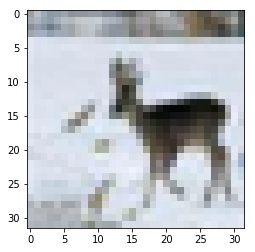

228


C:\Users\Malik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


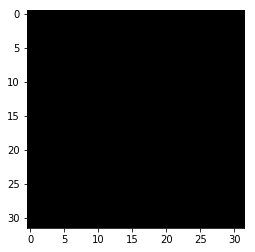

In [11]:
def affiche(img):
    img = img.reshape((32,32,3))
    m,M = img.min(), img.max()
    plt.imshow((img - m) / (M - m))
    plt.show()
    
affiche(fusionne(X[20]))
print(fusionne(X[20]).max())
affiche(centrer(X[20]))


In [35]:
def zca_whitening(X):
    cov = np.cov(X, rowvar=True)   # cov is (N, N)
    # singular value decomposition
    U,S,V = np.linalg.svd(cov)     # U is (N, N), S is (N,)
    # build the ZCA matrix
    epsilon = 1e-5
    zca_matrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T))
    # transform the image data       zca_matrix is (N,N)
    zca = np.dot(zca_matrix, X)    # zca is (N, 3072)
    return zca

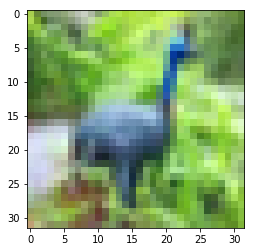

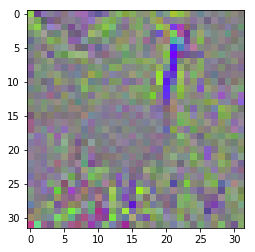

In [40]:
X_centered = centrer(X)

X_whitened = zca_whitening(X_centered)

affiche(X_centered[6])
affiche(X_whitened[6])



In [39]:
# affiche(X_whitened[6].reshape(-1,1))
print (X_whitened.shape)

print (X_centered.shape)

print (np.var(X_whitened[6]))

print (np.var(X[6]))

(10, 3072)
(10, 3072)
0.899707027485
2839.06116645


In [41]:
pickle_on = open("whitened.pickle", "wb")
pickle.dump(X_whitened, pickle_on)
pickle_on.close()

In [45]:
test_centred = centrer(X_test[:1000])
test_whitened = zca_whitening(test_centred)

In [46]:
compute_whitened(13, X_whitened, y, test_whitened, y_test, 1000)

Précision : 0.106
